<a href="https://colab.research.google.com/github/slazturk/heart_disease_project/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/bil548/heart.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.apply(pd.Series.value_counts)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0.0,NaN,312.0,497.0,NaN,NaN,872.0,497.0,NaN,680.0,329.0,74.0,578.0,7.0,499.0
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN
0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


<Axes: >

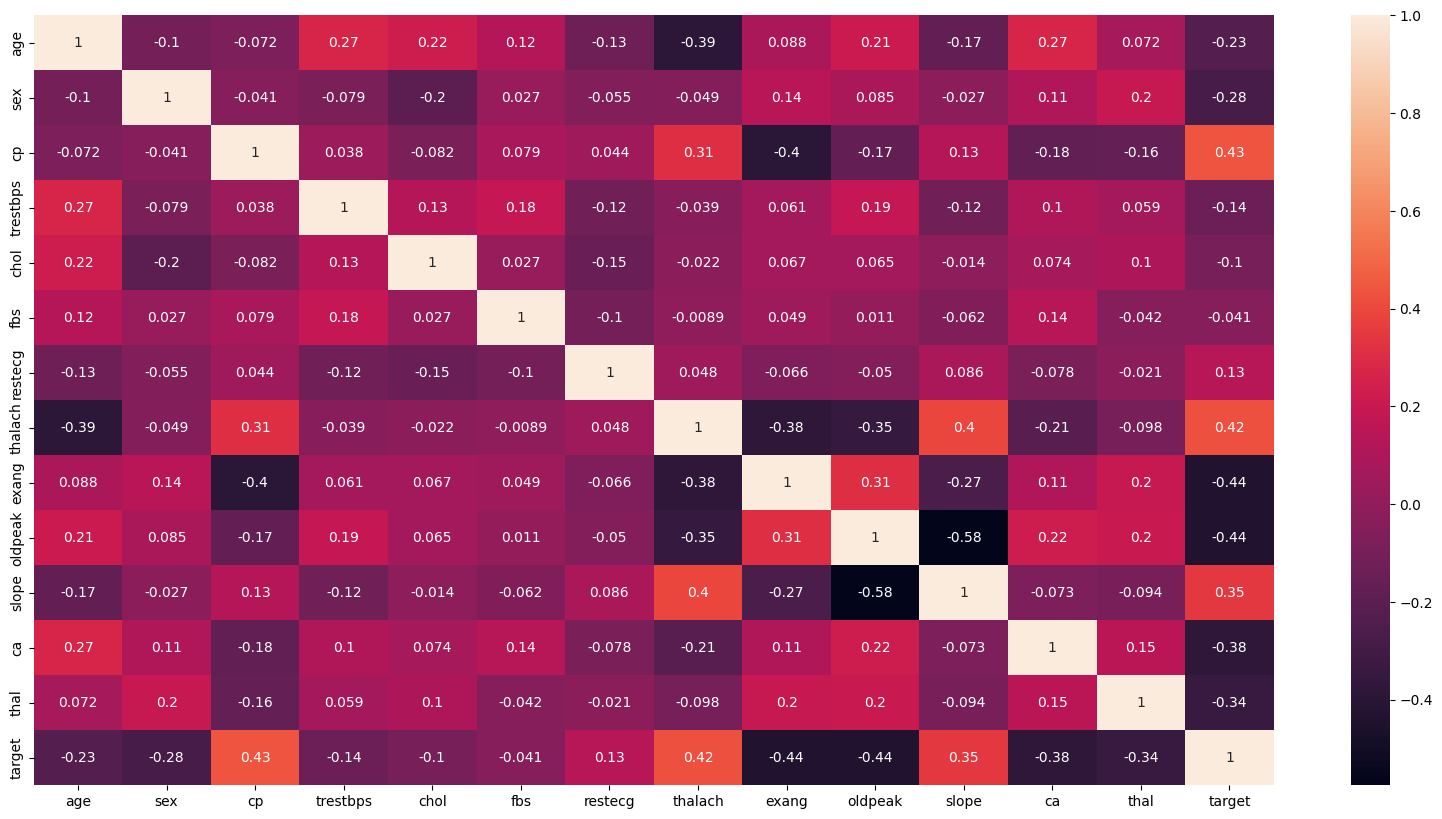

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

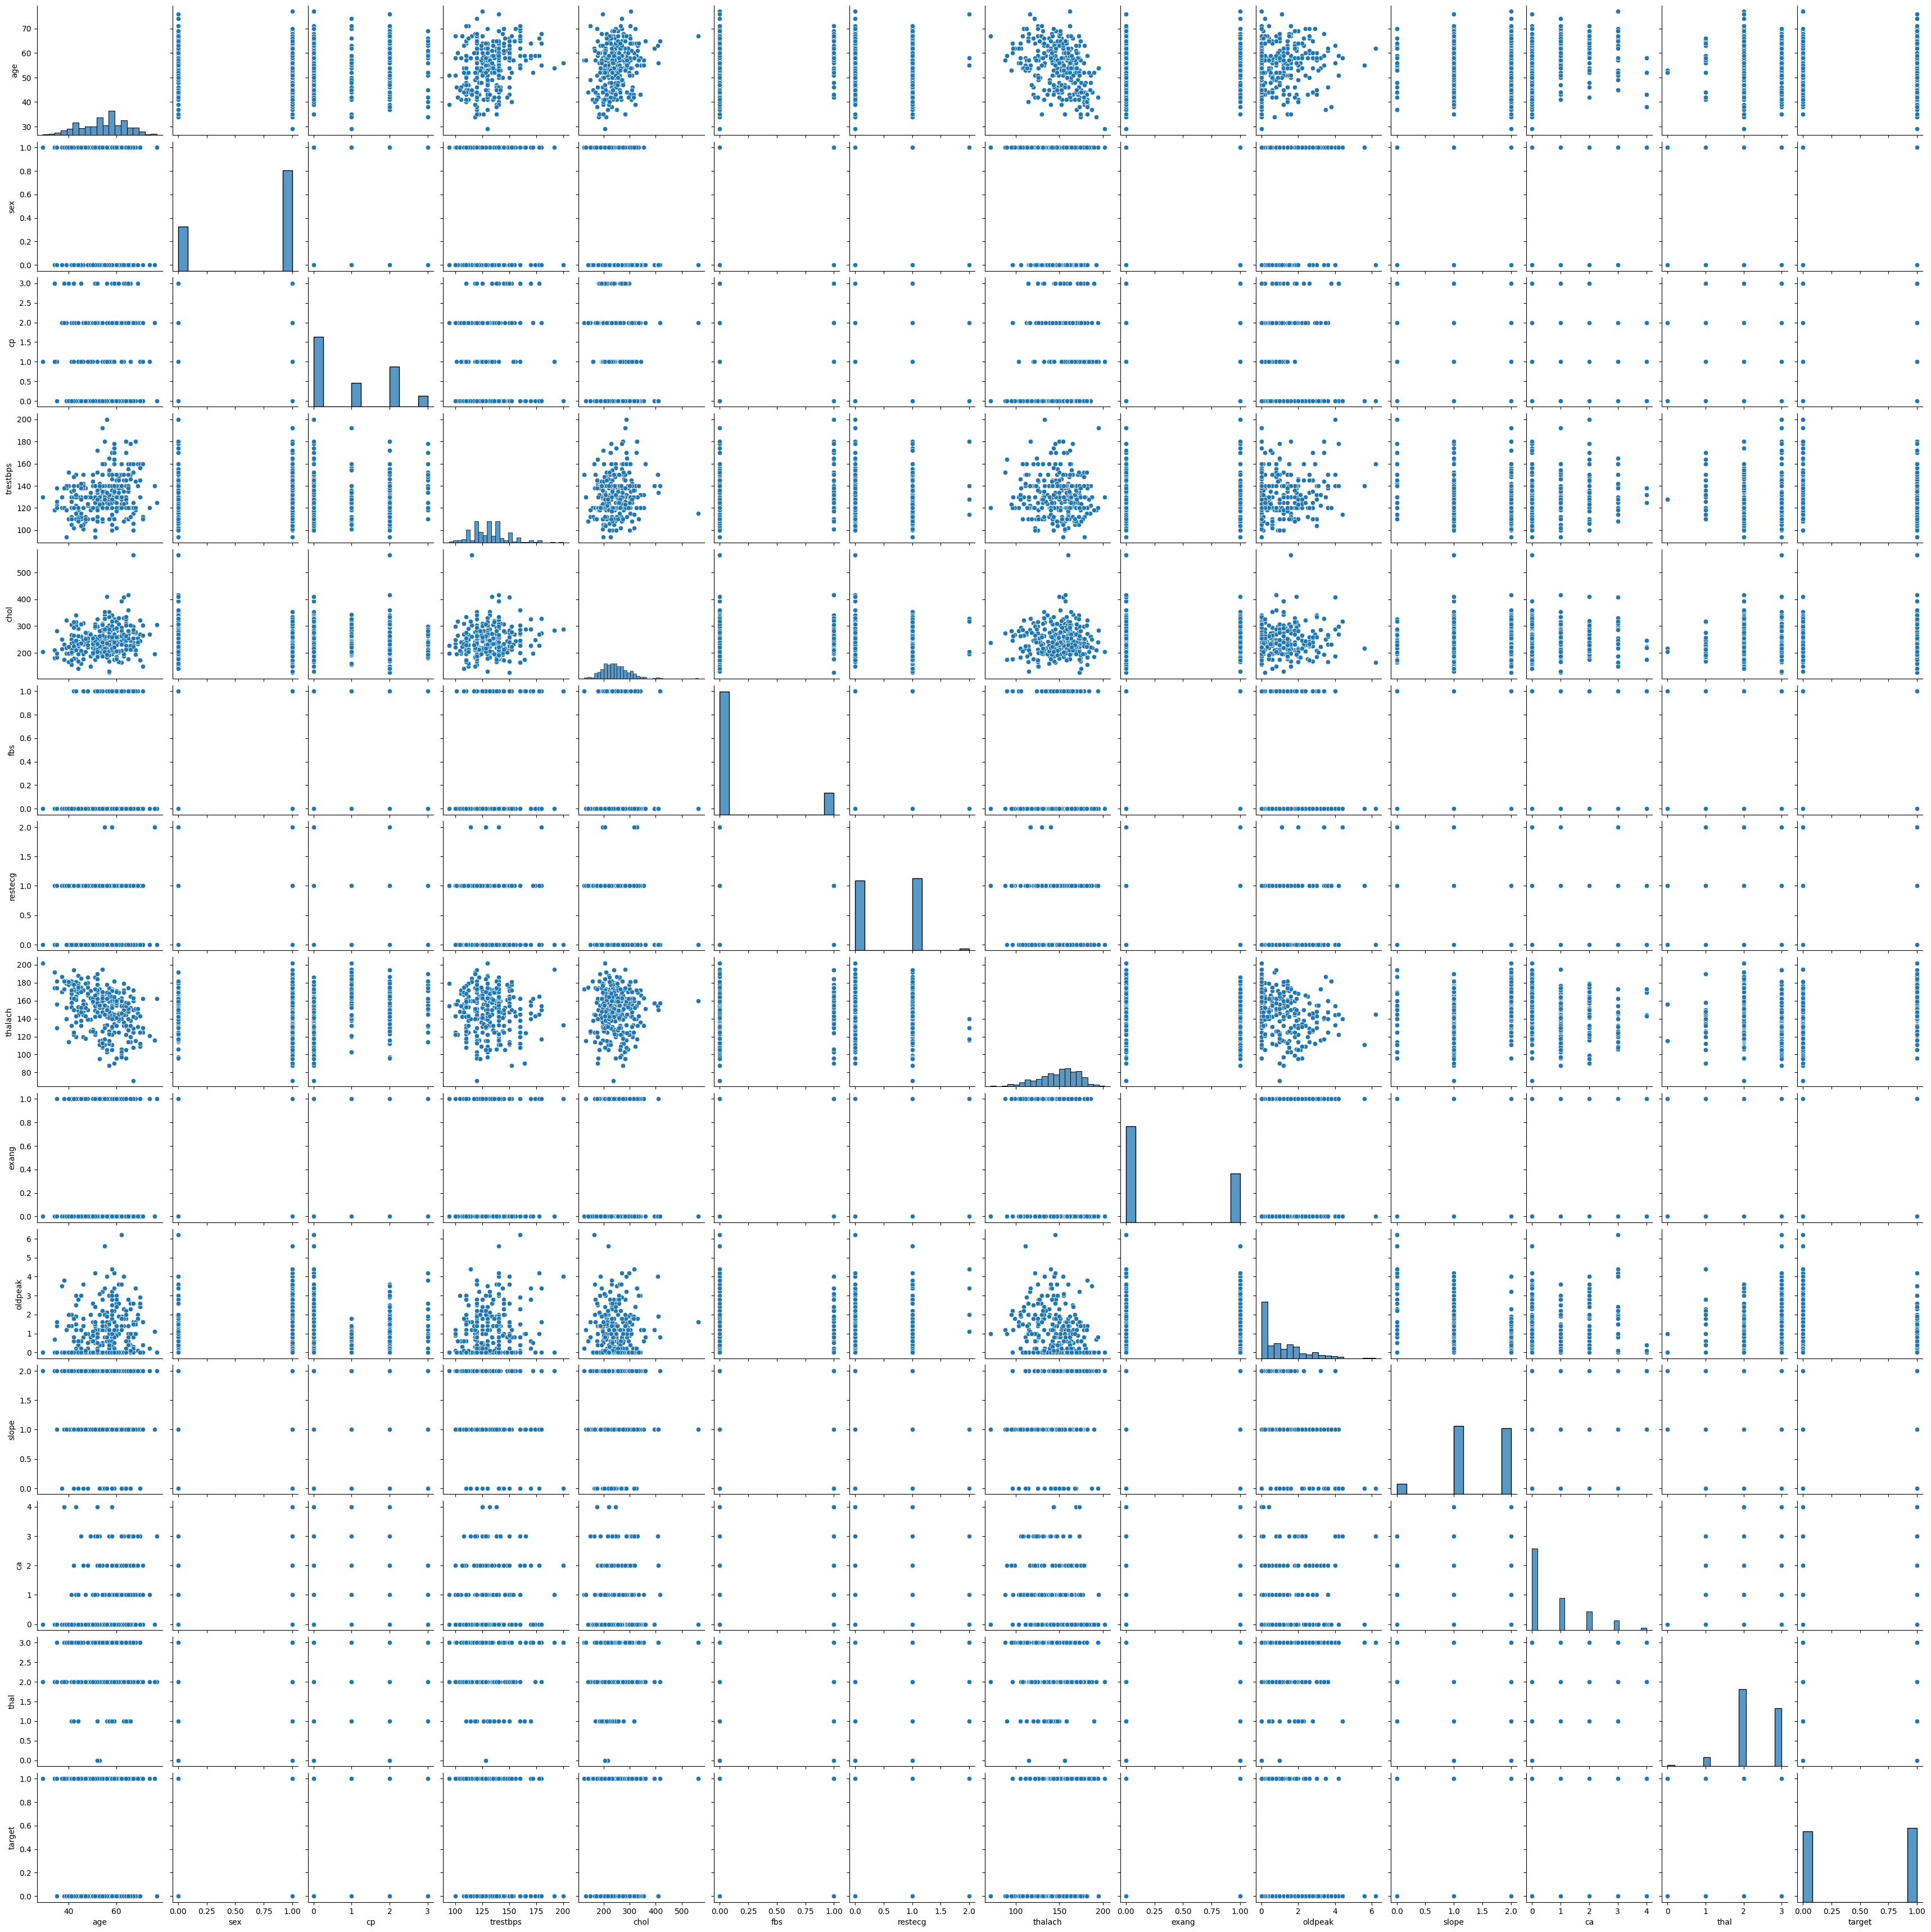

In [ ]:
sns.pairplot(data)
plt.show()


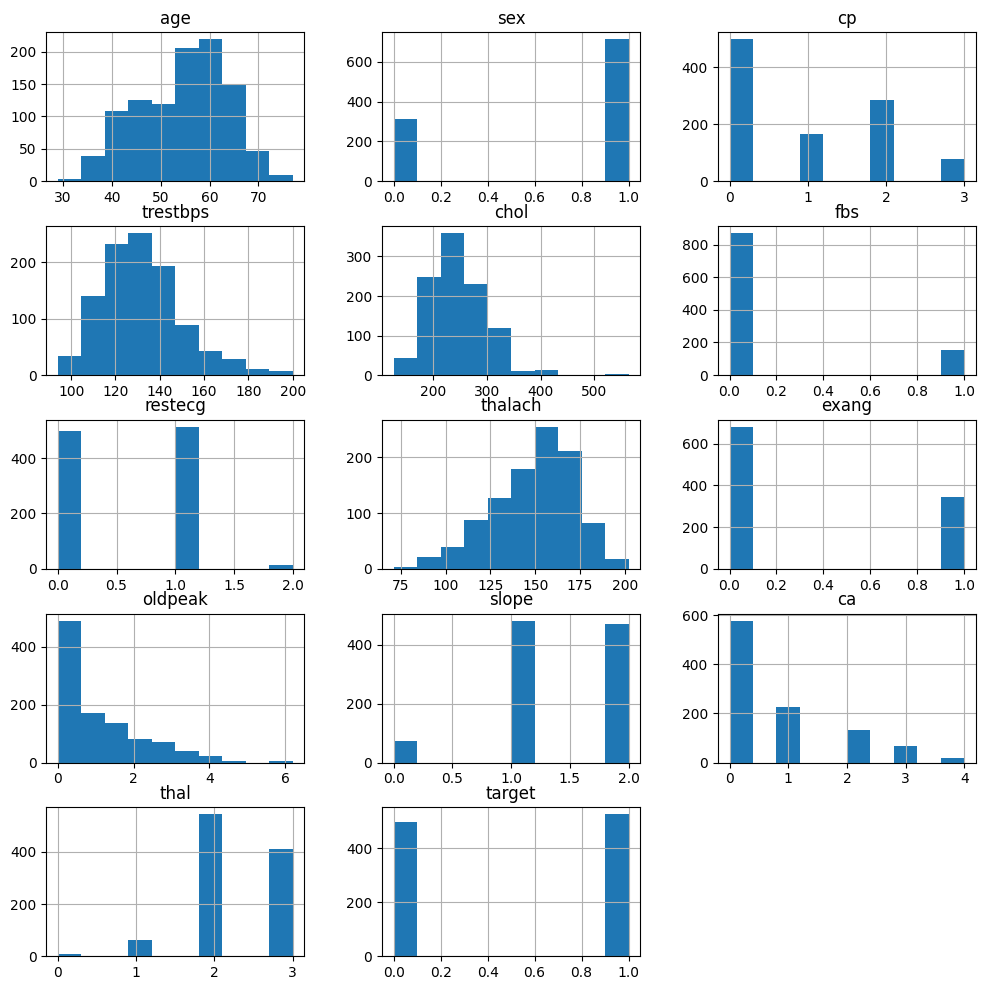

In [ ]:
data.hist(figsize=(12,12), layout=(5,3));

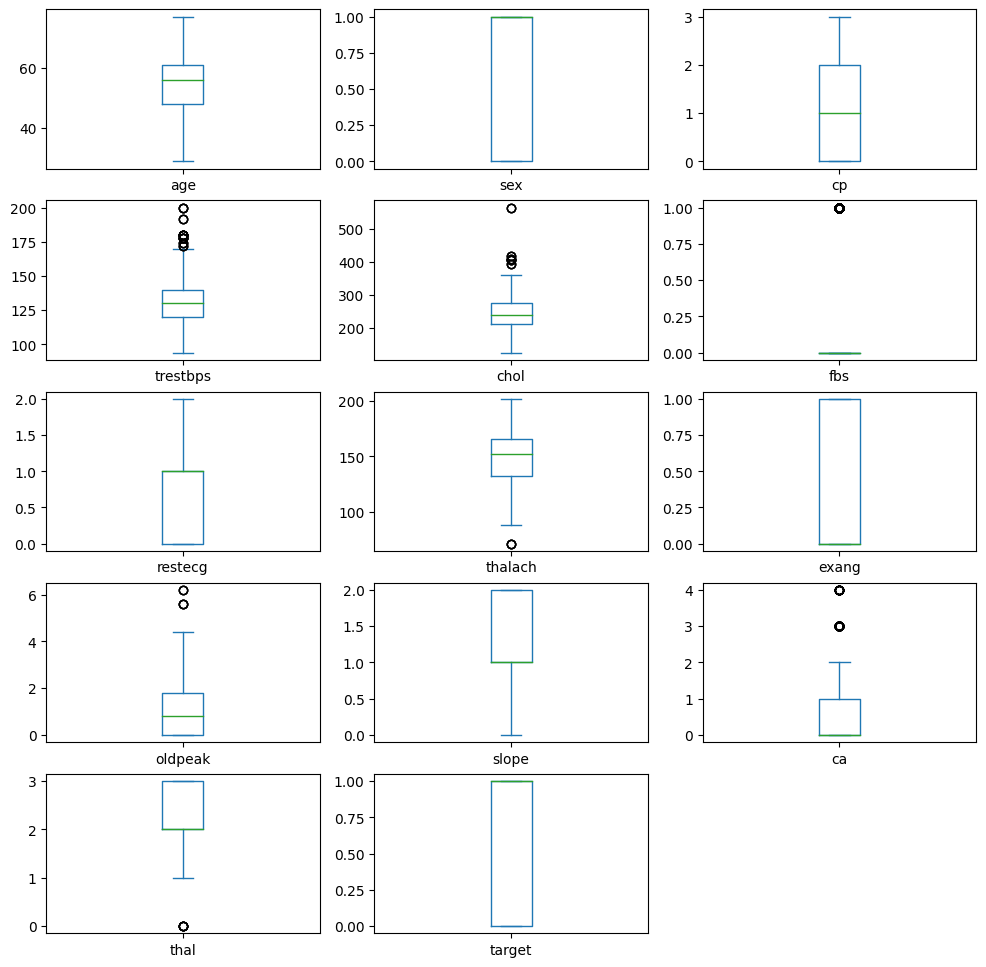

In [ ]:
data.plot(kind='box', subplots=True, layout=(5,3),figsize=(12,12))
plt.show()

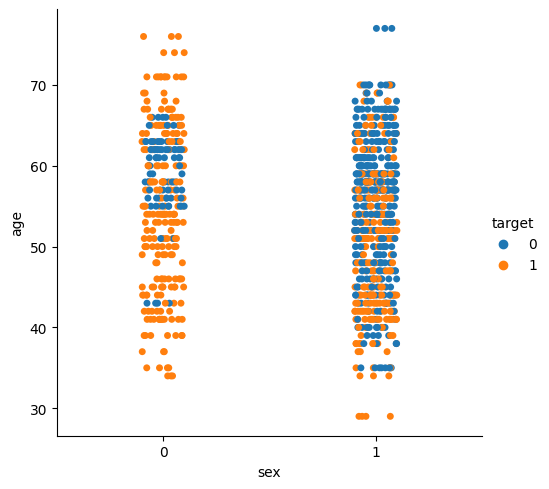

In [ ]:
sns.catplot(data, x='sex', y='age', hue='target')


<Axes: xlabel='sex', ylabel='chol'>

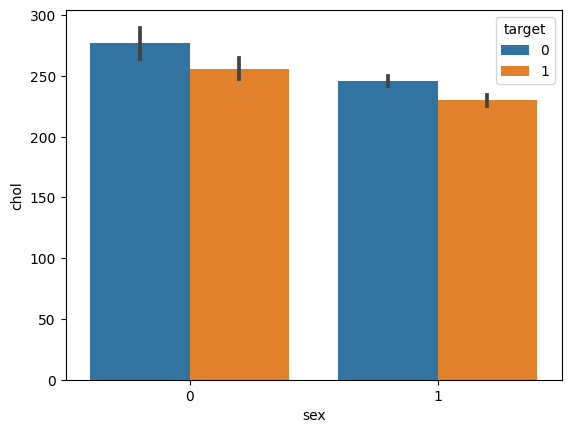

In [ ]:
sns.barplot(data, x='sex', y='chol', hue='target')

kolesterolün yüksek bir etkisi yokmuş

In [ ]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [ ]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
data['thalach'].value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

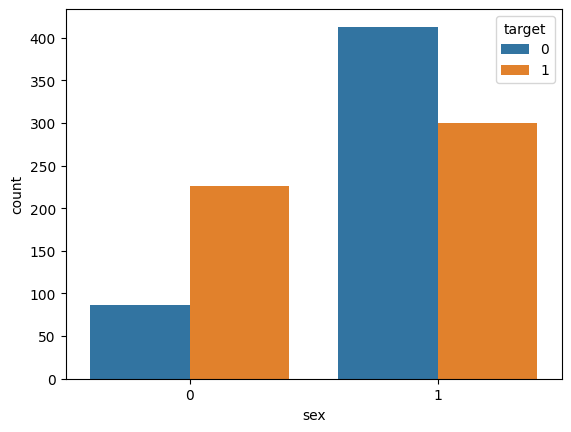

In [ ]:
sns.countplot(data, x='sex', hue='target')

<Axes: xlabel='ca', ylabel='count'>

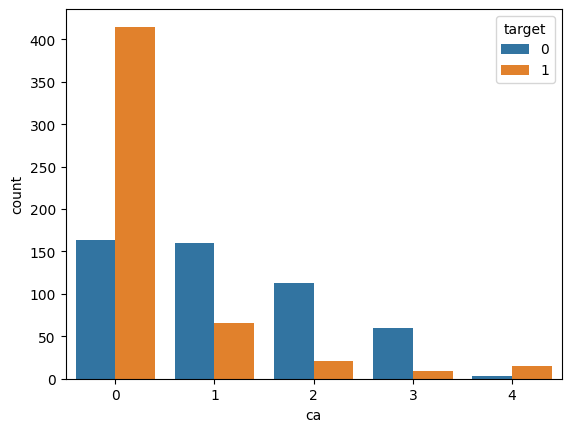

In [ ]:
sns.countplot(data, x='ca', hue='target')

<Axes: xlabel='cp', ylabel='count'>

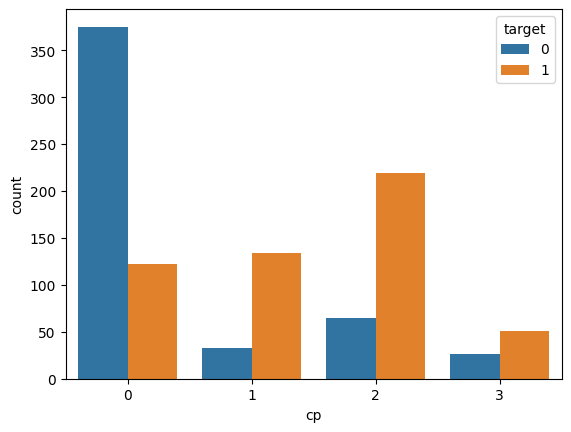

In [ ]:
sns.countplot(data, x='cp', hue='target')

<Axes: xlabel='target', ylabel='count'>

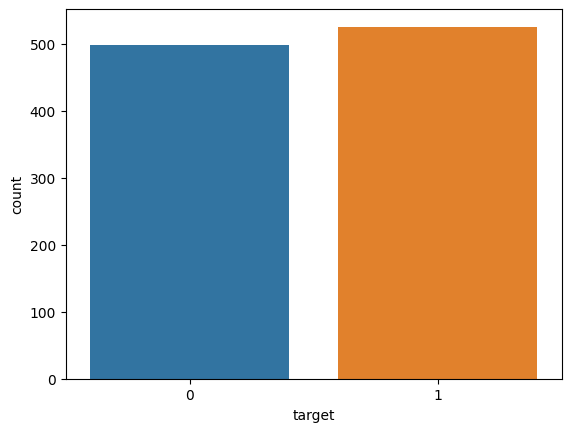

In [ ]:
sns.countplot(data, x='target')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
data[columns_to_scale] = StandardScaler.fit_transform(data[columns_to_scale])

In [ ]:
X= data.drop(['target'], axis=1)
Y= data['target']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(), X, Y, cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

mean_f1 = cross_val_score(LogisticRegression(), X, Y, scoring='f1', cv=5).mean()

mean_precision = cross_val_score(LogisticRegression(), X, Y, scoring='precision_macro', cv=5).mean()

mean_recall = cross_val_score(LogisticRegression(), X, Y, scoring='recall_macro', cv=5).mean()

print(mean_accuracy_lr)
print(mean_f1)
print(mean_precision)
print(mean_recall)

[0.88780488 0.85365854 0.87804878 0.82439024 0.80487805]
84.98
0.8597806235598338
0.853133358085962
0.848472759944458


In [ ]:
def confusion_matrix_scorer(clf, X, Y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(Y, y_pred)
    return {'tn': cm[0, 0], 'fp': cm[0, 1],
            'fn': cm[1, 0], 'tp': cm[1, 1]}
cv_results = cross_validate(LogisticRegression(), X, Y, cv=5, scoring=confusion_matrix_scorer)
# Getting the test set true positive scores
print(cv_results['test_tp'])
# Getting the test set false negative scores
print(cv_results['test_fn'])


[99 93 97 93 90]
[ 6 12  8 12 16]


In [ ]:
cv_score_svc = cross_val_score(SVC(kernel='linear'), X, Y, cv=5)

print(cv_score_svc)

mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)

mean_accuracy_svc = mean_accuracy_svc*100

mean_accuracy_svc = round(mean_accuracy_svc, 2)

mean_f1 = cross_val_score(SVC(kernel='linear'), X, Y, scoring='f1', cv=5).mean()

mean_precision = cross_val_score(SVC(kernel='linear'), X, Y, scoring='precision_macro', cv=5).mean()

mean_recall = cross_val_score(SVC(kernel='linear'), X, Y, scoring='recall_macro', cv=5).mean()

print(mean_accuracy_svc)
print(mean_f1)
print(mean_precision)
print(mean_recall)

[0.88292683 0.84878049 0.85365854 0.8097561  0.80487805]
84.0
0.8535173627193945
0.8468658629970216
0.838167959922677


In [ ]:
cv_score_knn = cross_val_score(KNeighborsClassifier(), X, Y, cv=5)

print(cv_score_knn)

mean_accuracy_knn = sum(cv_score_knn)/len(cv_score_knn)

mean_accuracy_knn = mean_accuracy_knn*100

mean_accuracy_knn = round(mean_accuracy_knn, 2)

mean_f1 = cross_val_score(KNeighborsClassifier(), X, Y, scoring='f1', cv=5).mean()

mean_precision = cross_val_score(KNeighborsClassifier(), X, Y, scoring='precision_macro', cv=5).mean()

mean_recall = cross_val_score(KNeighborsClassifier(), X, Y, scoring='recall_macro', cv=5).mean()

print(mean_accuracy_knn)
print(mean_f1)
print(mean_precision)
print(mean_recall)

[0.87804878 0.8195122  0.81463415 0.85365854 0.82926829]
83.9
0.8436546632325674
0.8393145658313326
0.838866236488878


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier

In [ ]:
cv_score_dc = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5)

print(cv_score_dc)

mean_accuracy_dc = sum(cv_score_dc)/len(cv_score_dc)

mean_accuracy_dc = mean_accuracy_dc*100

mean_accuracy_dc = round(mean_accuracy_dc, 2)

mean_f1 = cross_val_score(DecisionTreeClassifier(), X, Y, scoring='f1', cv=5).mean()

mean_precision = cross_val_score(DecisionTreeClassifier(), X, Y, scoring='precision_macro', cv=5).mean()

mean_recall = cross_val_score(DecisionTreeClassifier(), X, Y, scoring='recall_macro', cv=5).mean()

print(mean_accuracy_dc)
print(mean_f1)
print(mean_precision)
print(mean_recall)

[1. 1. 1. 1. 1.]
100.0
0.996116504854369
0.9961538461538462
0.9961904761904762


In [ ]:
cv_score_rf = cross_val_score(RandomForestClassifier(), X, Y, cv=5)

print(cv_score_rf)

mean_accuracy_rf = sum(cv_score_rf)/len(cv_score_rf)

mean_accuracy_rf = mean_accuracy_rf*100

mean_accuracy_rf = round(mean_accuracy_rf, 2)

mean_f1 = cross_val_score(RandomForestClassifier(), X, Y, scoring='f1', cv=5).mean()

mean_precision = cross_val_score(RandomForestClassifier(), X, Y, scoring='precision_macro', cv=5).mean()

mean_recall = cross_val_score(RandomForestClassifier(), X, Y, scoring='recall_macro', cv=5).mean()

print(mean_accuracy_rf)
print(mean_f1)
print(mean_precision)
print(mean_recall)

[1.         1.         1.         1.         0.98536585]
99.71
0.9972093023255815
0.9972477064220182
0.9969696969696968
